# <a href="https://thetahat.ru/">Машинное обучение ФБМФ</a>
## Домашнее задание 3

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_st_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 50 баллов
* Задача 2 &mdash;  40 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов

---

In [2]:
# Bot check

# HW_ID: bt_ml_hw3
# Бот проверит этот ID и предупредит, если случайно. сдать что-то не то.

# Status: not_final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения этой ячейке не влияют на факт сдачи работы.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.simplefilter('ignore', ConvergenceWarning)
import seaborn as sns
sns.set_theme('notebook', font_scale=1.2, palette='Set2')

from tqdm.notebook import tqdm

## Задача 1

Рассмотрим модель логистической регрессии. Признаки объекта представимы в виде $d$-мерного вектора $x \in \mathbb{R}^d$, класс имеет бернулиевское распределение $Y \sim Bern(\mu_\theta(x))$. Мы делаем следующее предположение о зависимости параметра вероятности от признаков
$${\mu_\theta(x) = \sigma(x^T\theta)= \cfrac{1}{1 + e^{-x^T\theta}}}.$$

При добавлении регуляризации к модели логистической регрессии оптимизируемый функционал принимает вид

$${F(\theta) = -\log L_{Y}(\theta) + \lambda \|\theta\|_2^2},$$

где ${L_{Y}(\theta)}$ &mdash; функция правдоподобия.

1. Выпишите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD).

2. Покажите, что $F(\theta)$ &mdash; выпуклая функция по $\theta$ и, как следствие, имеет единственный экстремум, являющийся глобальным максимумом. *Указание*. Посчитайте гессиан (матрицу вторых производных) и покажите, что она положительно определена.

3. Опишите, как может вести себя решение при отсутствии регуляризации, то есть при $\lambda = 0$

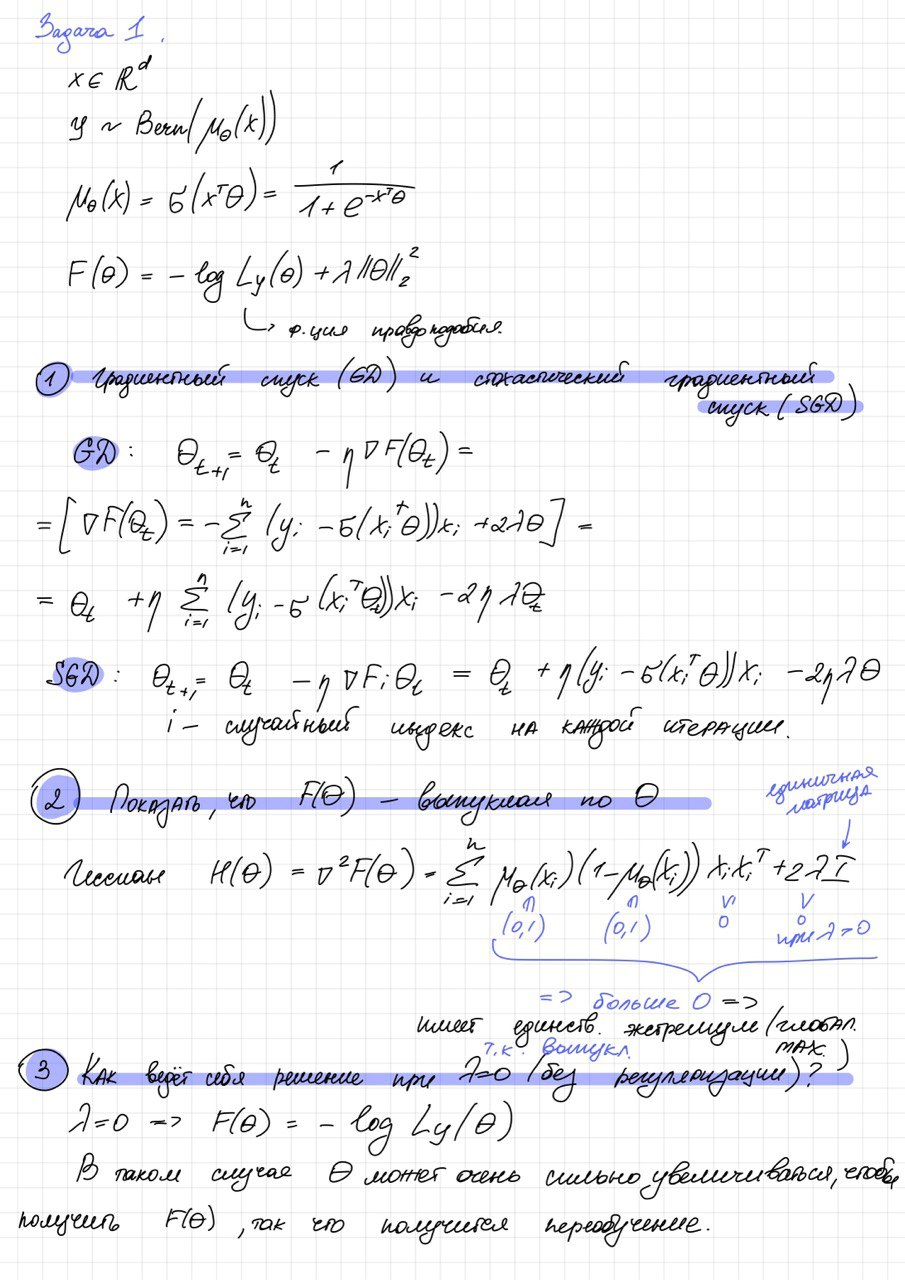

## Задача 2

### Введение


**РНК-интерференция** (англ. RNA interference; RNAi) &mdash; это естественный биологический процесс и перспективный с медицинской точки зрения метод подавления экспрессии генов в эукариотических клетках. Его применяют для [разработки новых лекарств](https://www.biopreparations.ru/jour/article/view/575?utm_source=chatgpt.com), генной терапии и изучения функций генов.

Механизм РНК-интерференции работает так: поступившая в клетку экзогенная двухцепочечная РНК связывается с <abbr title="Рибонуклеазы (или РНК-азы) - ферменты-нуклеазы, катализирующие  расщепление РНК на более мелкие компоненты. Dicer относится к семеству РНКазы III.">рибонуклеазой Dicer</abbr>, которая нарезает ее на  ***малые интерферирующие РНК,*** **или миРНК**  **(small interfering RNA, siRNA)** &mdash; *небольшие фрагменты длиной 20–25 пар нуклеотидов*. Эти фрагменты взаимодействуют с <abbr title="RNA-induced silencing complex или RISC — мультибелковый комплекс, в состав которого входит один из белков семейства Argonaute и малые интерферирующие РНК. Белки Argonaute имеют эндонуклеазную активность по отношению к мРНК, комплементарным связанному фрагменту siRNA.">комплексом RISC</abbr>, который использует siRNA как «наводку» для поиска нужной молекулы мРНК и расщепляет её, подавляя работу гена.

> *Примечание.* В русскоязычной литературе аббревиатурой "миРНК" обозначают как siRNA, так и <abbr title="МикроРНК (miRNA) — это короткие эндогенные РНК, которые, подобно siRNA, подавляют экспрессию генов, но связываются они с мРНК частично комплементарно, регулируя множество мишеней и подавляя трансляцию, а не вызывая прямую деградацию.">miRNA (микро-РНК)</abbr>, что нередко приводит к путанице. Условимся, под миРНК мы будем иметь в виду именно *малые интерферирующие РНК (siRNA)*.


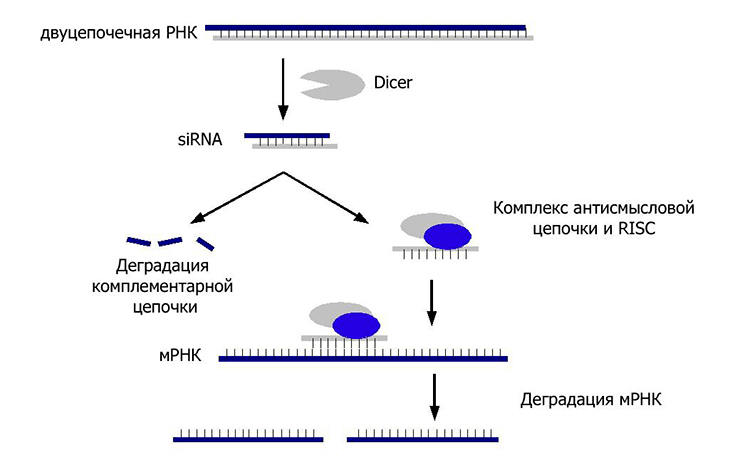



*Проблема* заключается в том, что не все миРНК одинаково эффективны в подавлении экспрессии генов. Способность миРНК к ингибированию измеряется с помощью количественной <abbr title="ПЦР с обратной транскрипцией">ОТ-ПЦР</abbr>, *однако* существуют гипотезы, что определенные характеристики олигонуклеотидов могут предсказать их эффективность.

**Описание датасета**

[Датасет](https://www.kaggle.com/datasets/livtoft/sirna-activity/data) содержит 653 олигонуклеотида, информацию о целевой мРНК, последовательности миРНК, а также характеристики, которые могут быть предикторами активности миРНК.

* `target mRNA` &mdash; идентификатор целевой мРНК.

* `Start / End` &mdash; начальная и конечная позиции миРНК на целевой мРНК.

* `Sequence` &mdash; последовательность нуклеотидов в миРНК.

* `G / U` &mdash; количество нуклеотидов гуанина (G) и урацила (U) в миРНК.

* `bi` &mdash; стабильность димеров антисмысловой цепи (энергия связи между одинаковыми цепями).

* `uni` &mdash; внутримолекулярная стабильность антисмысловой цепи (способность цепи формировать петли или шпильки).

* `duplex` &mdash; энергия связи между антисмысловой и смысловой цепями миРНК (чем меньше, тем прочнее комплекс).

* `Pos1,2,6,13,14,18` &mdash; стабильность связи пар оснований в ключевых позициях siRNA при взаимодействии с мРНК.
* `Dif_5-3` &mdash; разница стабильности концов миРНК (5' и 3').

* `Content+ / Content-` &mdash; содержание нуклеотидов на положительной и отрицательной цепи.

* `Cons+ / Cons- / Cons_Sum` &mdash; консервативность последовательностей (на положительной, отрицательной цепи и суммарно).

* `Hyb19` &mdash; энергия гибридизации с мРНК (длина 19 пар оснований).

* `target` &mdash; цель (идентификатор).

* `Activity` &mdash; процент остаточной экспрессии целевой мРНК. **Чем меньше активность, тем выше эффективность подавления экспрессии гена.**

Согласно [оригинальной статье](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-7-65#Tab1), эти признаки должны помочь выявлять миРНК, наиболее эффективно подавляющие экспрессию гена.

### 1. Загрузка и подготовка данных
Загрузите датасет и выведите первые несколько строк.

In [13]:
data = pd.read_csv('data.csv')
data.head(5)

,Target seq,Start,End,Sequence,G,U,bi,uni,duplex,Pos1,...,Pos18,Dif_5-3,Content+,Content-,Cons+,Cons-,Cons_Sum,Hyb19,target,Activity
0,M60857,195,213,AUUAUCCACUGUUUUUGGA,3,9,-7.0,-1.9,-28.1,-1.1,...,-2.4,-1.3,2,6,2,6,4,0.001175,-8.1,24.7
1,M60857,197,215,AAAUUAUCCACUGUUUUUG,2,9,-0.7,0.0,-24.2,-0.9,...,-2.1,-1.2,1,6,1,5,4,0.001175,-8.1,9.8
2,M60857,199,217,CAAAAUUAUCCACUGUUUU,1,8,-1.5,0.0,-24.2,-2.1,...,-0.9,1.2,2,5,3,2,-1,0.001175,-11.4,50.5
3,M60857,201,219,CACAAAAUUAUCCACUGUU,1,6,-0.6,0.0,-26.7,-2.1,...,-0.9,1.2,3,3,3,3,0,0.001175,-14.5,83.7
4,M60857,203,221,GCCACAAAAUUAUCCACUG,2,4,-0.1,0.0,-30.3,-3.4,...,-2.1,1.3,4,2,2,3,1,0.001175,-17.8,60.3


Проверьте, есть ли в данных пропуски? Все ли столбцы имеют числовой формат?

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Target seq  653 non-null    object 
 1   Start       653 non-null    int64  
 2   End         653 non-null    int64  
 3   Sequence    653 non-null    object 
 4   G           653 non-null    int64  
 5   U           653 non-null    int64  
 6   bi          653 non-null    float64
 7   uni         653 non-null    float64
 8   duplex      653 non-null    float64
 9   Pos1        653 non-null    float64
 10  Pos2        653 non-null    float64
 11  Pos6        653 non-null    float64
 12  Pos13       653 non-null    float64
 13  Pos14       653 non-null    float64
 14  Pos18       653 non-null    float64
 15  Dif_5-3     653 non-null    float64
 16  Content+    653 non-null    int64  
 17  Content-    653 non-null    int64  
 18  Cons+       653 non-null    int64  
 19  Cons-       653 non-null    i

In [18]:
data.isna().sum()

Target seq    0
Start         0
End           0
Sequence      0
G             0
U             0
bi            0
uni           0
duplex        0
Pos1          0
Pos2          0
Pos6          0
Pos13         0
Pos14         0
Pos18         0
Dif_5-3       0
Content+      0
Content-      0
Cons+         0
Cons-         0
Cons_Sum      0
Hyb19         0
target        0
Activity      0
dtype: int64

**Ответ:** Пропусков в данных нет, а вот тип данных разный - к нечисловым относятся строки из Target seq и Sequence

Отличается ли масштаб у числовых признаков?

In [22]:
data.describe()

,Start,End,G,U,bi,uni,duplex,Pos1,Pos2,Pos6,...,Pos18,Dif_5-3,Content+,Content-,Cons+,Cons-,Cons_Sum,Hyb19,target,Activity
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,...,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,972.715161,990.715161,4.362940,5.422665,-7.446095,-1.106432,-34.111639,-2.060337,-2.086371,-2.149923,...,-2.174119,-0.113783,3.267994,3.165391,3.866769,3.687596,-0.179173,0.000628,-15.422052,42.473858
std,769.976871,769.976871,1.975689,2.326608,4.678564,1.491547,4.365093,0.763692,0.768782,0.762777,...,0.772666,1.043763,1.852747,2.086378,1.660350,1.554861,2.769808,0.000386,6.661961,31.139170
min,1.000000,19.000000,0.000000,0.000000,-26.600000,-7.900000,-49.900000,-3.400000,-3.400000,-3.400000,...,-3.400000,-2.500000,0.000000,0.000000,0.000000,0.000000,-8.000000,0.000089,-37.200000,0.000000
25%,329.000000,347.000000,3.000000,4.000000,-9.900000,-1.900000,-36.700000,-2.400000,-2.400000,-2.400000,...,-2.400000,-1.000000,2.000000,2.000000,3.000000,3.000000,-2.000000,0.000335,-20.100000,16.100000
50%,779.000000,797.000000,4.000000,5.000000,-7.000000,-0.300000,-33.700000,-2.100000,-2.100000,-2.100000,...,-2.100000,0.000000,3.000000,3.000000,4.000000,4.000000,0.000000,0.000549,-14.600000,36.110000
75%,1504.000000,1522.000000,6.000000,7.000000,-4.000000,0.000000,-31.000000,-1.300000,-1.300000,-2.100000,...,-2.100000,0.300000,4.000000,4.000000,5.000000,5.000000,2.000000,0.000779,-10.600000,61.913592
max,5524.000000,5542.000000,12.000000,13.000000,4.100000,0.000000,-22.300000,-0.900000,-0.900000,-0.900000,...,-0.900000,2.400000,12.000000,10.000000,9.000000,8.000000,7.000000,0.002350,0.000000,127.800000


**Ответ:** Да, отличается. Видим например, что в столбцах Start и End значения порядка 700, в то время как в столбце Hyb19 на 7 порядков меньше

Посмотрим на распределение активности:

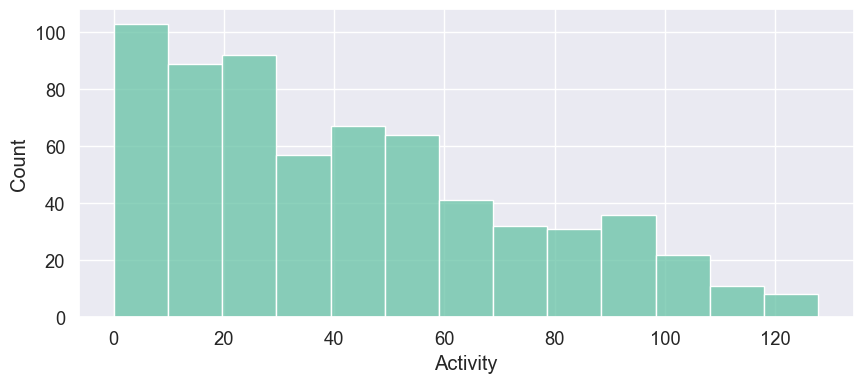

In [26]:
plt.figure(figsize=(10, 4))
sns.histplot(data['Activity']);

Удивление могут вызывать значения активности свыше 100%. Как будто бы в некоторых случаях последовательность миРНК вместо подавления, напротив, усиливала экспрессию мРНК. Эта тайна, покрытая мраком, остаётся на совести экспериментаторов 🤔. Более важно научиться предсказывать эффективные последовательности, т. е. с низкой активностью. В качестве порогового значения возьмём 30% и будем пытаться отделять (классифицировать) эффективные и неэффективные цепочки миРНК по такому правилу:

*   1 (эффективная): миРНК снижает уровень мРНК более чем на 70% (значение активности ≤ 30%).

*   0 (неэффективная): миРНК снижает уровень мРНК менее чем на 30% (значение активности > 30%).

Установите порог, выделите матрицу признаков и целевую переменную. Из матрицы признаков удалите нечисловые столбцы

In [30]:
threshold = 30
y = (data['Activity'] <= threshold).astype(int)
X = data.drop(['Activity', 'Target seq', 'Sequence'], axis = 1)

X.shape, y.shape

((653, 21), (653,))

Посчитайте количество нулей и единиц в таргете. Лучше всего представить ответ в виде графика с двумя столбцами, высота которых соответствует количеству объектов класса (см. например, [`sns.countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html)). Есть ли дисбаланс между классами?

[]

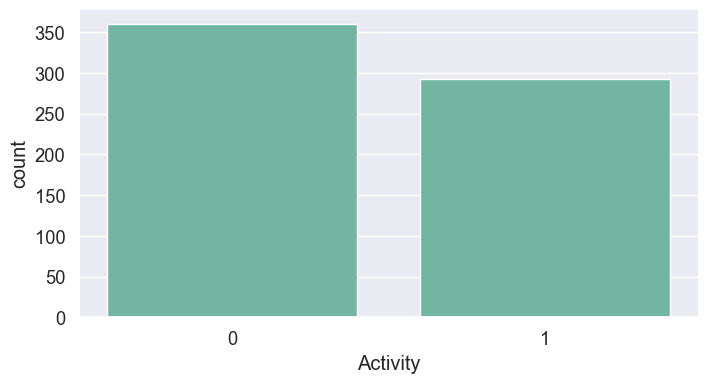

In [33]:
plt.figure(figsize=(8, 4))
sns.countplot(x = y)
plt.plot()

**Ответ:** Классы не равны, есть небольшой перекос в сторону неэффективных

Хорошо ли обусловлена матрица $X$? О чём это говорит?

In [37]:
print(f"Число обусловленности матрицы X: {np.linalg.cond(X)}")

Число обусловленности матрицы X: 4.3138760024815575e+18


**Ответ:** 18 степень говорит, что матрица X просто ужасно обусловлена. Можно предположить, что наши данные мультиколлинеарны,  значит надо прибегнуть к регуляризации.

Для наглядности, выведите матрицу корреляций. Что означают элементы матрицы? А в нашем случае?

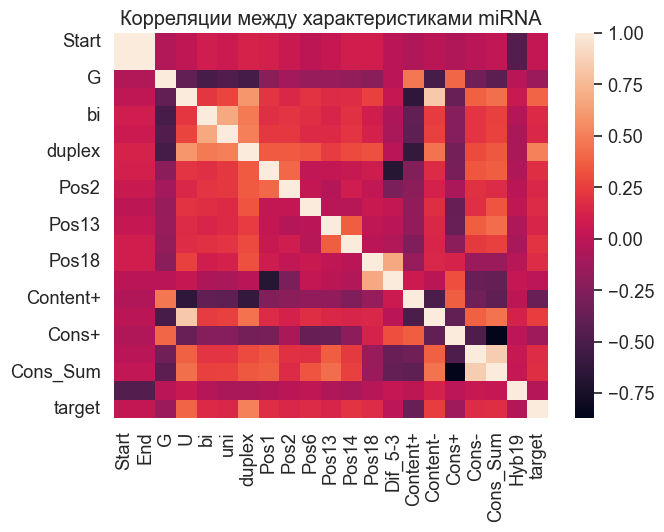

In [41]:
plt.figure(figsize=(7, 5))
sns.heatmap(X.corr()).set(title="Корреляции между характеристиками miRNA");

**Ответ:** Каждая ячейка этой таблицы - попарная корреляция между всеми числовыми столбцами таблицы X. Когда значения близки к +-1, то тут могут быть замешанны мультиколлинеарные признаки

Разделите данные на обучающую и тестовую выборки в отношении 3:2. Вам не подойдет стандартный метод `test_train_split`, так как в данных есть группы (столбец `Target seq`): для каждой целевой последовательности подбирались различные цепочки миРНК:

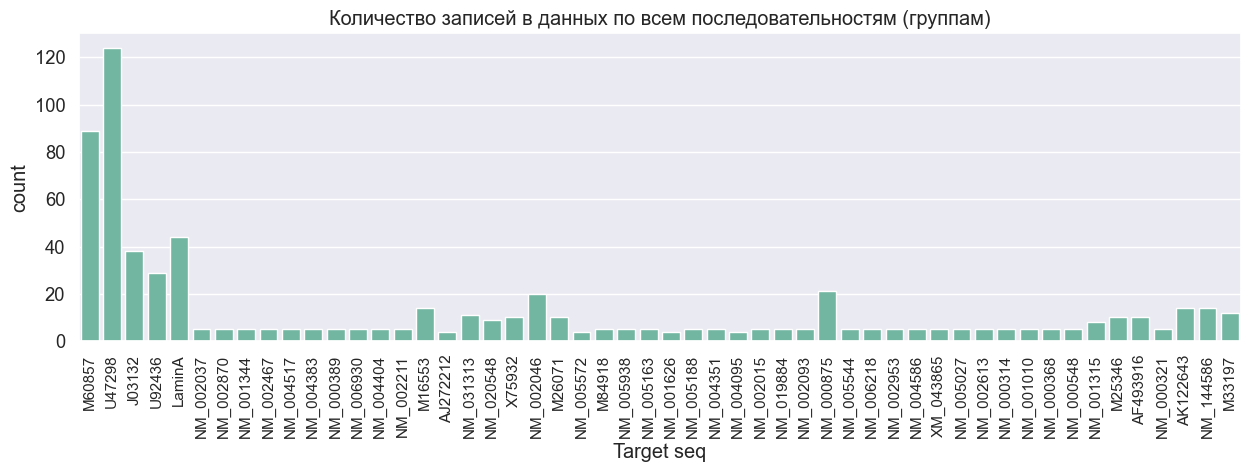

In [45]:
plt.figure(figsize=(15, 4))
sns.countplot(x=data['Target seq'])
plt.xticks(rotation=90, fontsize=11)
plt.title('Количество записей в данных по всем последовательностям (группам)');

Реализуйте разделение на тренировочную и тестовую выборки так, чтобы все группы попали целиком только в одну из частей. Вы можете реализовать алгоритм самостоятельно или воспользоваться готовыми решениями, например `GroupShuffleSplit`, используя метод `groups`.

In [48]:
partition = GroupShuffleSplit(n_splits=1, train_size=0.6, test_size=0.4, random_state=42)

for train_index, test_index in partition.split(X, y, groups=data['Target seq']):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

Выведите что-либо, подтверждающее корректность вашего разбиения. Чем плохо, если элементы выборки, соответствующие одной и той же целевой последовательности, попадут одновременно в тестовую и обучающую выборку?

In [51]:
# Проверяем есть ли пересечение
train_set = set(data.iloc[train_index]['Target seq'])
test_set = set(data.iloc[test_index]['Target seq'])
train_set.intersection(test_set)

set()

**Ответ:** Видим, что пересечений нет и разделение прошло верно. Если одна и та же целевая последовательность есть и в обучающей, и в тестовой выборках, то модель при тестировании будет показывать завышенные результаты, так как это буквально та же группа с теми же отличительными признаками. 

Выведите распределение данных по классам для обеих выборок, аналогично тому, как вы делали в начале для всей выборки. Одинаково ли распределение на трейне и валидации?

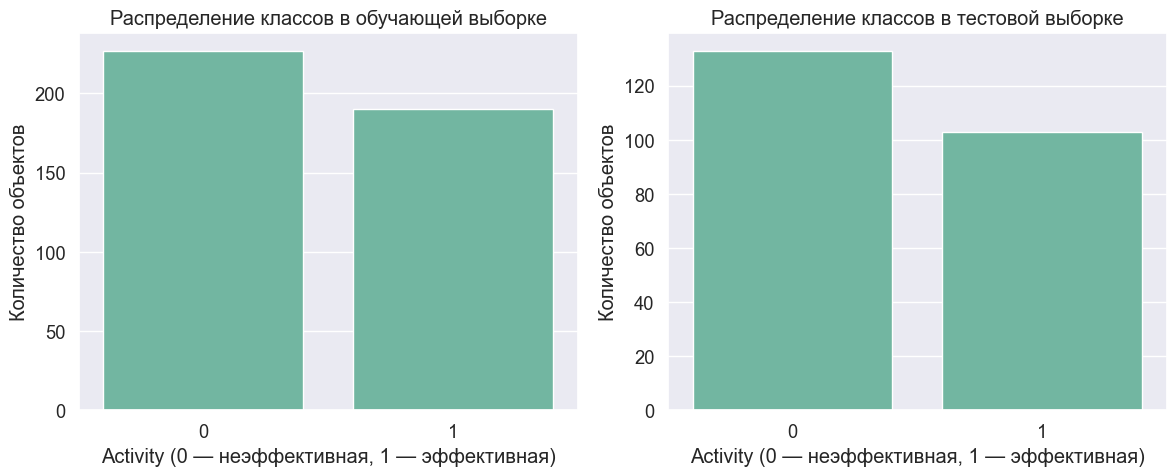

In [55]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Распределение классов в обучающей выборке')
plt.xlabel('Activity (0 — неэффективная, 1 — эффективная)')
plt.ylabel('Количество объектов')

plt.subplot(1, 2, 2)
sns.countplot(x=y_test)
plt.title('Распределение классов в тестовой выборке')
plt.xlabel('Activity (0 — неэффективная, 1 — эффективная)')
plt.ylabel('Количество объектов')

plt.tight_layout()
plt.show()

**Ответ:** Отличия получились примерно такими же как и в целой выборке выше

В случае, если распределение получилось сильно не одинаковым, для оценки качества моделей лучше пользоваться метрикой [`balanced_accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score). В руководстве подробно [описано](https://scikit-learn.org/stable/modules/model_evaluation.html#balanced-accuracy-score), как эта метрика определяется в `sklearn`.

Стандартизируйте данные.

In [60]:
scaler = StandardScaler()

# Нормируем train и test. Не забываем, что нельзя применять
# метод fit для тестовой выборки, чтобы модель ничего не знала о тестовых данных.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)   # писать .fit_transform(X_test) КАТЕГОРИЧЕСКИ запрещается

### 2. Модельки, модельки, модельки...

#### 2.1 Самый популярный класс

Найдите самый популярный класс в обучающей выборке и посчитайте точность ответа на трейне и тесте только этим классом &mdash; константой. Отличается ли взвешенная точность от обычной?

In [64]:
superclass = np.bincount(y_train).argmax()
print(f"Самый популярный класс в обучающей выборке: {superclass}")

Самый популярный класс в обучающей выборке: 0


In [66]:
y_train_null = np.full_like(y_train, superclass) 
y_test_null = np.full_like(y_test, superclass)

train_accuracy = accuracy_score(y_train, y_train_null)
print(f"Точность на обучающей выборке: {train_accuracy:.4f}")

train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_null)
print(f"Взвешенная точность на обучающей выборке: {train_balanced_accuracy:.4f}")

Точность на обучающей выборке: 0.5444
Взвешенная точность на обучающей выборке: 0.5000


In [68]:
test_accuracy = accuracy_score(y_test, y_test_null)
print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_null)
print(f"Взвешенная точность на тестовой выборке: {test_balanced_accuracy:.4f}")

Точность на тестовой выборке: 0.5636
Взвешенная точность на тестовой выборке: 0.5000


**Вывод:** Взвешенная точность ровно 50%, так как учёлся небольшой перевес (который вносит разницу в незвешенную точность).

#### 2.2 Логистическая регрессия без регуляризации

Обучите классическую логистическую регрессию и выведите точность ответа на трейне и тесте. Отличается ли взвешенная точность от обычной?

><details>
  <summary>  Подсказка ✍️</summary>
  Чему равен аргумент `penalty` по умолчанию?
 </details><br/>

In [72]:
log_model = LogisticRegression(fit_intercept = True, max_iter = 2000, random_state = 42)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [74]:
y_train_log_pred = log_model.predict(X_train)
y_test_log_pred = log_model.predict(X_test)

In [76]:
train_accuracy = accuracy_score(y_train, y_train_log_pred)
print(f"Точность на обучающей выборке: {train_accuracy:.4f}")

train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_log_pred)
print(f"Взвешенная точность на обучающей выборке: {train_balanced_accuracy:.4f}")

Точность на обучающей выборке: 0.7530
Взвешенная точность на обучающей выборке: 0.7491


In [78]:
test_accuracy = accuracy_score(y_test, y_test_log_pred)
print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_log_pred)
print(f"Взвешенная точность на тестовой выборке: {test_balanced_accuracy:.4f}")

Точность на тестовой выборке: 0.6186
Взвешенная точность на тестовой выборке: 0.5971


**Вывод:** Да, взвешенная точность оказывается меньше обычной, что логично, так как она учитывает распределение между классами. Видно также, что точность на обучающей выборке выше, что тоже логично, так как мы обучали буквально на тех же данных. 

#### 2.2 Логистическая регрессия с регуляризацией

За что отвечает гиперпараметр `C` у класса `LogisticRegression`?

**Ответ:** Это гиперпараметр, который контролирует силу регуляризации, причём он обратно пропорционален коэффициенту регуляризации. Тогда чем больше C, тем меньше регуляризация (меньше штраф за большие коэффициенты). А чем меньше C, тем сильнее регуляризация (больше штраф за большие коэффициенты). Соответственно для формул L1 и L2 регуляризации он будет фигурировать


Вам необходимо исследовать зависимость от `C` следующих величин:
1. Accuracy на трейне
2. Accuracy на тесте
3. Коэффициенты модели

Чтобы постоянно не пришлось обучать модели при одних и тех же сетках `C`, предлагается написать функцию, которая будет принимать на вход вид штрафа `penalty`, границы диапазона `C`, и саму выборку. На каждой итерации вычисляйте все величины и сохраняйте в виде списков. После этого переходите к визуализации и выводам.

>&#x2755;*Указание*&#x2755; Для отладки кода можно использовать очень редкую сетку гиперпараметра `C`. В финальном решении желательно использовать не менее 100 точек на интервал.

In [116]:
def train_alpha_grid(min_log_C, max_log_C, resolution, X_train, y_train, X_test, y_test, penalty, solver='newton-cholesky', max_iter=100, l1_ratio=None):
    """Обучает модель LogisticRegression для разных значений параметра регуляризации C,
    сохраняет коэффициенты, вычисляет accuracy на обучающей и тестовой выборках.

    Args:
        min_log_C: минимальное значение log10(C) для сетки
        max_log_C: максимальное значение log10(C) для сетки
        resolution: число точек на сетке C
        X_train: обучающая выборка (признаки)
        y_train: отклик на обучающей выборке
        X_test: тестовая выборка (признаки)
        y_test: отклик на тестовой выборке
        penalty: тип регуляризации ('l1', 'l2', 'elasticnet', 'none')
        solver: метод оптимизации параметров модели (см. аргумент `solver` у класса LogisticRegression).
        max_iter: обучение останавливается, если требуемая точность не достигнута за max_iter итераций

    Returns:
        coefs_list: список коэффициентов для каждого значения C
        acc_train_list: список accuracy на обучающей выборке для каждого значения C
        acc_test_list: список accuracy на тестовой выборке для каждого значения C
    """
    C_grid = np.logspace(min_log_C, max_log_C, resolution)
    coefs_list = []
    acc_train_list = []
    acc_test_list = []
    for C in C_grid:
        if penalty == 'elasticnet':
            model = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=max_iter, l1_ratio=l1_ratio)
        else:
            model = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=max_iter)
        
        model.fit(X_train, y_train)
        
        coefs_list.append(model.coef_) # для графика 3 с коэффициентами

        y_train_pred = model.predict(X_train)
        acc_train = accuracy_score(y_train, y_train_pred)
        acc_train_list.append(acc_train)
        
        y_test_pred = model.predict(X_test)
        acc_test = accuracy_score(y_test, y_test_pred)
        acc_test_list.append(acc_test)
    
    return coefs_list, acc_train_list, acc_test_list, C_grid

Проведите эксперимент для 3-х разных моделей: с $L_1$-, $L_2$, и комбинированной регуляризацией (`l1_ratio=0.5`).

>Рекомендации:
*   Для каждой модели подоберите границы интервала для `C`. Не берите слишком узкие, чтобы видеть на графике всю картину. Для слишком широких границ придётся брать больше точек.
*   Настройте передаваемые гиперпараметры модели так, чтобы интерпретатор не выбрасывал никаких предупреждений и ошибок. Огромное полотно из `warning`-ов в решении будет говорить о том, что в обучении что-то пошло не так (нет сходимости, неверный `solver` и пр.)

Нарисуйте треки коэффициентов моделей в зависимости от `C`. Легенду можно сделать общую, если все графики помещаются на экране. Отразите в ней наименования признаков для соответствующих коэффициентов. Сделать красиво могут помочь заметки [отсюда](https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot).

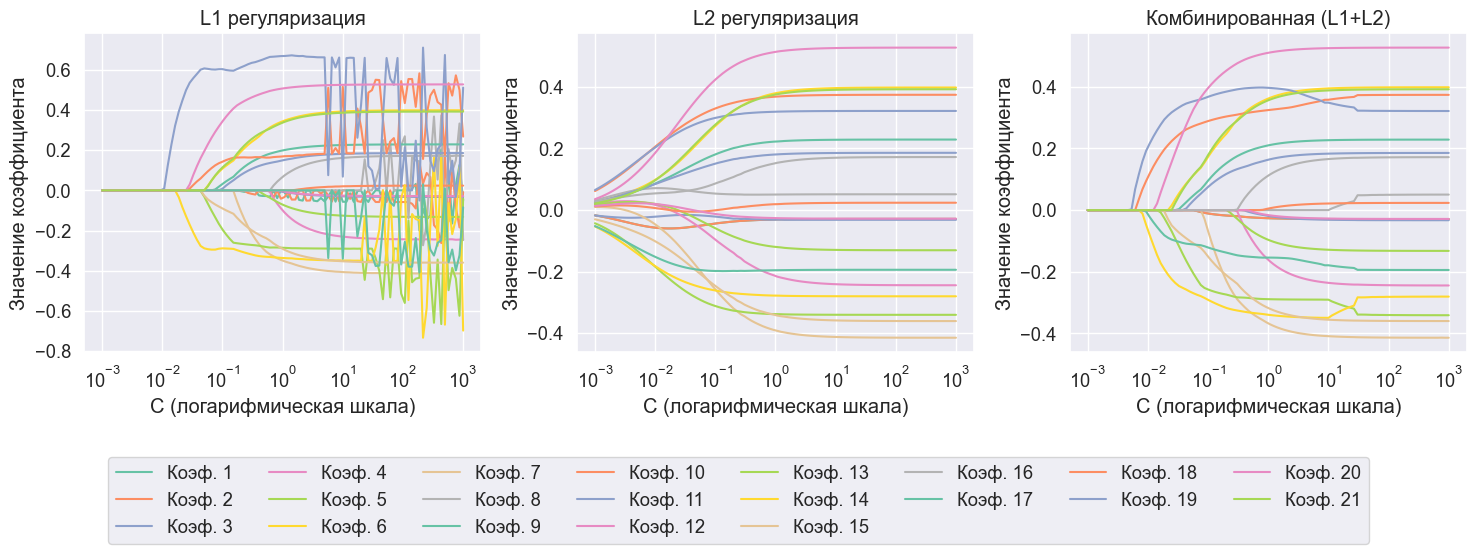

In [151]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
penalties = ['l1', 'l2', 'elasticnet']
titles = ['L1 регуляризация', 'L2 регуляризация', 'Комбинированная (L1+L2)']
solvers = ['liblinear', 'lbfgs', 'saga']
all_labels = []

for i, (penalty, title, solver) in enumerate(zip(penalties, titles, solvers)):
    l1_ratio = 0.5 if penalty == 'elasticnet' else None
    coefs_list, acc_train_list, acc_test_list, C_grid = train_alpha_grid(
        min_log_C=-3, max_log_C=3, resolution=100, 
        X_train=X_train, y_train=y_train, 
        X_test=X_test, y_test=y_test, 
        penalty=penalty, solver=solver, max_iter=500, 
        l1_ratio=l1_ratio if penalty == 'elasticnet' else None
    )
    
    coefs_array = np.array(coefs_list)
    for j in range(coefs_array.shape[2]):
        line, = axes[i].semilogx(C_grid, coefs_array[:, 0, j], label=f'Коэф. {j + 1}')
        if i == 0:
            all_labels.append(line)
    
    axes[i].set_xlabel('C (логарифмическая шкала)')
    axes[i].set_ylabel('Значение коэффициента')
    axes[i].set_title(title)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
fig.legend(all_labels, [f'Коэф. {j + 1}' for j in range(coefs_array.shape[2])], loc='lower center', ncol=8, bbox_to_anchor=(0.5, -0.18))

plt.show()

**Вывод:** Для elasticnet характерны резкие скачки, при которых резко увеличивается значение коэффициентов. Для L2 регуляризации изменения плавные, а вот в L1 при больших значениях C начинаются постоянные скачки.

Нарисуйте зависимости точности предсказания от `C` на обучающей и тестовой выборках. Скомпонуйте всё на 2-3 графиках. Для наглядности также проведите горизонтальную линию, соответствующую точности модели без регуляризации.

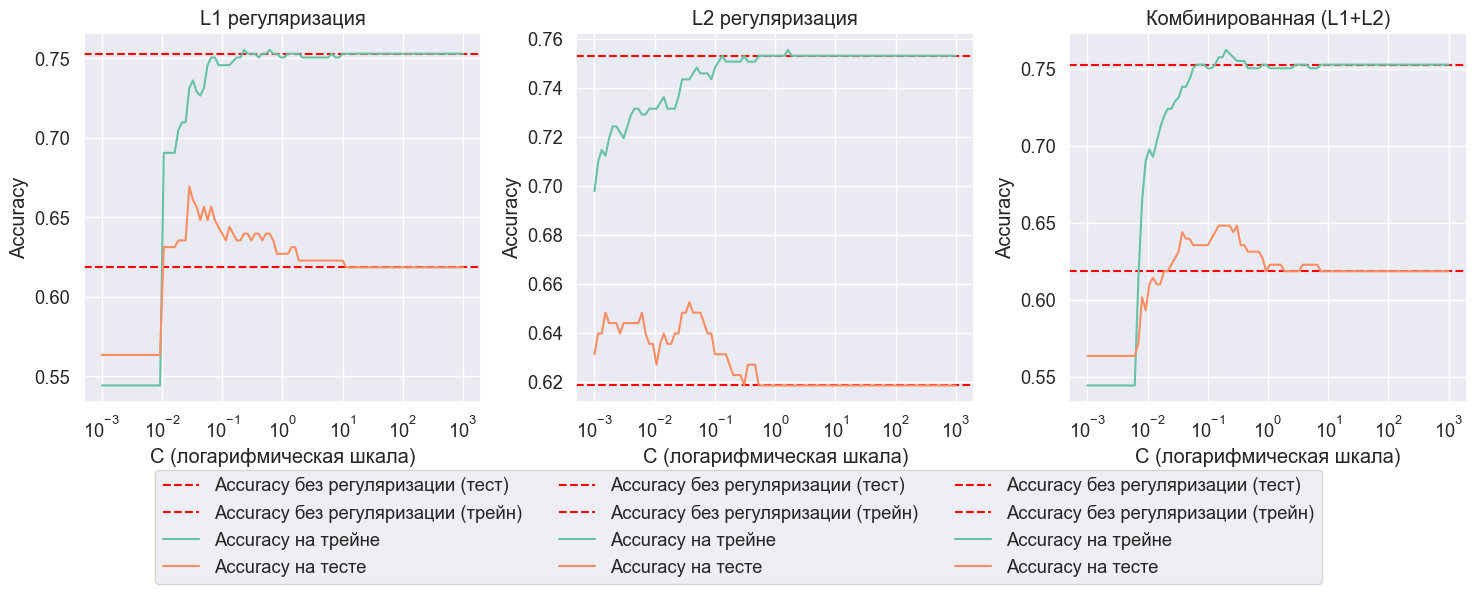

In [182]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
penalties = ['l1', 'l2', 'elasticnet']
titles = ['L1 регуляризация', 'L2 регуляризация', 'Комбинированная (L1+L2)']
solvers = ['liblinear', 'lbfgs', 'saga']

for i, (penalty, title, solver) in enumerate(zip(penalties, titles, solvers)):
    l1_ratio = 0.5 if penalty == 'elasticnet' else None
    coefs_list, acc_train_list, acc_test_list, C_grid = train_alpha_grid(
        min_log_C=-3, max_log_C=3, resolution=100, 
        X_train=X_train, y_train=y_train, 
        X_test=X_test, y_test=y_test, 
        penalty=penalty, solver=solver, max_iter=1000, 
        l1_ratio=l1_ratio if penalty == 'elasticnet' else None
    )
    axes[i].axhline(y=test_accuracy, color='r', linestyle='--', label='Accuracy без регуляризации (тест)')
    axes[i].axhline(y=train_accuracy, color='r', linestyle='--', label='Accuracy без регуляризации (трейн)')
    axes[i].semilogx(C_grid, acc_train_list, label='Accuracy на трейне')
    axes[i].semilogx(C_grid, acc_test_list, label='Accuracy на тесте')
    axes[i].set_xlabel('C (логарифмическая шкала)')
    axes[i].set_ylabel('Accuracy')
    axes[i].set_title(title)
fig.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.21))

plt.tight_layout()
plt.show()

**Вывод:** Очевидно, точность на тренировочных данных всегда выше, о чём я уже писала выше. Так же видим, что при увеличении C точность устремляется к результатам без регуляризации, Что тоже логично, ведь у нас очень сильно уменьшается регуляризация с увеличением C.

## Задача 3

И зачем мне всё это? &mdash; давайте разбираться. Продолжаем работать с этим датасетом.


Остановимся на $L_2$-регуляризации. Исследуйте зависимость числа обусловленности от параметра `C`. Постройте соответствующий график.

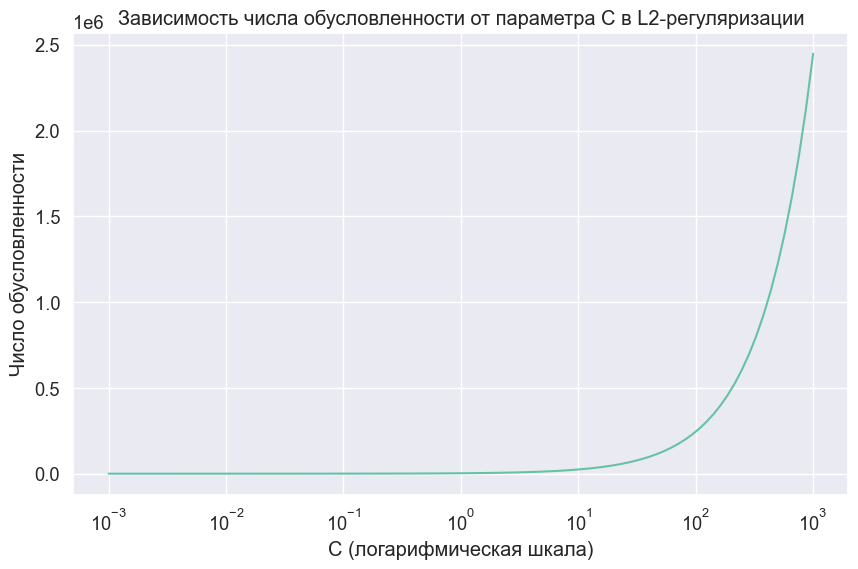

In [192]:
def obusl(X, C):
    lambda_ = 1 / C
    XTX = X.T @ X
    XTX_reg = XTX + lambda_ * np.eye(XTX.shape[0])
    singular_values = np.linalg.svd(XTX_reg, compute_uv=False)
    cond_number = np.max(singular_values) / np.min(singular_values)
    return cond_number

min_log_C = -3
max_log_C = 3
resolution = 100
C_values = np.logspace(min_log_C, max_log_C, resolution)

condition_numbers = [obusl(X_train, C) for C in C_values]

plt.figure(figsize=(10, 6))
plt.semilogx(C_values, condition_numbers)
plt.xlabel('C (логарифмическая шкала)')
plt.ylabel('Число обусловленности')
plt.title('Зависимость числа обусловленности от параметра C в L2-регуляризации')
plt.show()

Прокомментируйте получившуюся зависимость.

**Вывод:** При увеличении C, то есть уменьшая регуляции, у нас матрица становится всё хуже обусловлена. Причём рост очень быстрый (экспоненциальный в логарифмических координатах!)

Исследуйте разброс ответов моделей для логистической регерессии с регуляризацией и без.

Для начала выберем некоторый объект выборки (единственный). Для него фиксируем признаки $X_0$ и отклик $y_0$:

In [ ]:
test_point_index = X.index[500] # 500 - произвольный индекс
X_test_point = X.loc[test_point_index].to_numpy().reshape(1, -1)
y_test_point = y[test_point_index]

Из общего массива объектов (а не из `X_train` или `X_test`) удалите выбранную точку, а также все объекты из этой же группы (т.е. с такой же целевой мРНК), чтобы не использовать их при обучении. Проверьте, что размер матрицы уменьшился на размер группы.

Напишите функцию, которая

1. Случайным образом выбирает из матрицы $X$ половину объектов.
2. Обучает логистическую регрессию с заданным `C` на полученной подвыборке.
3. Делает предсказание на выбранном ранее объекте
4. Считает число обусловленности матрицы $X$
5. Повторяет пункты 1-4 много раз
6. Возвращает все предсказания на выбранном объекте и среднее число обусловленности.

Напоминаем, что вы без ограничений можете пользоваться кодом, который был рассказан на занятиях.

In [ ]:
def fit_predict_ntimes(X, y, X_test_point,  C=0.0, n_repeats=1000):
    """Обучает n_repeats раз логистическую регрессию со штрафом C и возвращает
    предсказания на X_test_point вместе со средним числом обусловленности.

    Args:
        X: обучающая выборка
        y: отклики на обучающей выборке
        X_test_point: тестовая точка
        С: коэффициент регуляризации
        n_repeats: число повторений

    Returns:
        (
            Массив предказаний на объекте X_test_point,
            средее число обусловленности
        )
    """

    <...>

Проведите эксперимент для не менее чем 1000 повторений для модели без регуляризации. Можете установить `penalty=None` либо установить большое `C`. Аналогично сделайте для логистической регрессии по умолчанию.

На одном графике изобразите ядерные оценки плотности предсказаний модели для обоих случаев. На графике также должно фигурировать среднее всех предсказаний и истинное значение $y$. Сравните числа обусловленности.

Сделайте вывод. Есть ли, всё же, польза от регуляризации в этой задаче? Если да, то в чём она заключается? Почему разработчики `sklearn` реализовали в логистической регрессии регуляризацию по-умолчанию? Почему по-умолчанию стоит именно $L_2$, а не $L_1$?

**Вывод:**

**Интересные статьи:**

[Червивый путь к Нобелю: история miRNA и больших открытий](https://nplus1.ru/material/2024/10/08/microrna-nobel2024)